---

### **Question 1a)**  &nbsp;&nbsp; (5 points)

The proposed parametric formula for $f$ is
$$f(x)=\frac{c_{1}}{x}+\frac{c_{2}}{x^{2}}$$
Since the ODE is linear, it suffices to verify that $u_1(x):=\frac{1}{x}$ and $u_2(x):=\frac{1}{x^{2}}$ satisfy the ODE, then any linear combination of these two particular solutions will satisfy the ODE as well. We have
$$u_{1}(x)=\frac{1}{x},\quad u_{1}^{'}(x)=-\frac{1}{x^2},\quad u_{1}^{''}(x)=\frac{2}{x^3}$$
$$u_{2}(x)=\frac{1}{x^{2}},\quad u_{2}^{'}(x)=-\frac{2}{x^{3}},\quad u_{2}^{''}(x)=\frac{6}{x^{4}}$$
Therefore
$$\begin{align*}
 & x^{2}u_{1}^{''}(x)+4xu_{1}^{'}(x)+2u_{1}(x)=x^{2}\left(\frac{2}{x^3}\right)+4x\left(-\frac{1}{x^2}\right)+2\left(\frac{1}{x}\right)\\
 & =\frac{2}{x}-\frac{4}{x}+\frac{2}{x}=0
\end{align*}$$
and
$$\begin{align*}
 & x^{2}u_{2}^{''}(x)+4xu_{2}^{'}(x)+2u_{2}(x)=x^{2}\left(\frac{6}{x^{4}}\right)+4x\left(-\frac{2}{x^{3}}\right)+2\left(\frac{1}{x^{2}}\right)\\
 & =\frac{6}{x^2}-\frac{8}{x^2}+\frac{2}{x^2}=0
\end{align*}$$

This shows that $u_{1}$ and $u_{2}$ satisfy the ODE, and therefore
$f(x)=c_{1}u_{1}(x)+c_{2}u_{2}(x)$ is solution of the ODE for any constants
$c_{1}$ and $c_{2}$.

---

### **Question 1b)**  &nbsp;&nbsp; (5 points)

$f(1)=c_{1}+c_{2}=0$ and $f'(1)=-c_{1}-2c_{2}=4$, therefore
$$\begin{align*}
 & c_{1}=2f(1)+f'(1)=2\times0+4=4\\
 & c_{2}=-f'(1)-f(1)=-0-4=-4
\end{align*}$$
and the particular solution is $f(x)=\frac{4}{x}-\frac{4}{x^{2}}$.

---

### **Question 2a)**  &nbsp;&nbsp; (10 points)

The first-order centered difference approximation of the first-order
derivative $f'(x_{i})$ is given by $\frac{f_{i+1}-f_{i-1}}{2\Delta_{x}}$,
and the second-order centered difference approximation of the second-order
derivative $f''(x_{i})$ is given by $\frac{f_{i+1}-2f_{i}+f_{i-1}}{\Delta_{x}^{2}}$.
If we plug these two approximations in the ODE, we
obtain the following finite-difference scheme
$$x_{i}^{2}\left(\frac{f_{i+1}-2f_{i}+f_{i-1}}{\Delta_{x}^{2}}\right)+4x_{i}\left(\frac{f_{i+1}-f_{i-1}}{2\Delta_{x}}\right)+2f_{i}=0\ ,\ \ i=0,1,\ldots,N$$
After rearranging the terms, we can write the finite-difference scheme
as
$$d_{i}f_{i-1}+m_{i}f_{i}+u_{i}f_{i+1}=0\ ,\ \ i=0,1,\ldots,N$$
where
$$\begin{align*}
 & d_{i}:=\frac{x_{i}^{2}}{\Delta_{x}^{2}}-2\frac{x_{i}}{\Delta_{x}} \\
 & m_{i}:=2-2\frac{x_{i}^{2}}{\Delta_{x}^{2}}\\
 & u_{i}:=\frac{x_{i}^{2}}{\Delta_{x}^{2}}+2\frac{x_{i}}{\Delta_{x}}
\end{align*}$$
Note that since the ODE is equal to zero, the
terms $d_{i}$, $m_{i}$ and $u_{i}$ are defined up to a multiplicative
constant. For example, the following definitions are also valid
$$\begin{align*}
 & d_{i}:=x_{i}^{2}-2x_{i}\Delta_{x} \\
 & m_{i}:=2\Delta_{x}^{2}-2x_{i}^{2}\\
 & u_{i}:=x_{i}^{2}+2x_{i}\Delta_{x}
\end{align*}$$
They are obtained by multiplying the previous definitions by the constant
number $\Delta_{x}^{2}$.

---

#### 易错点

一阶中心差分一定注意：分母有 `2`！

---

### **Question 2b)**  &nbsp;&nbsp; (5 points)

The above finite-difference equations can be written
as

$$\left[\begin{array}{ccccc}
m_{0} & u_{0} & 0 & \cdots & 0\\
d_{1} & m_{1} & u_{1} & \ddots & \vdots\\
0 & \ddots & \ddots & \ddots & 0\\
\vdots & \ddots & d_{N-1} & m_{N-1} & u_{N-1}\\
0 & \cdots & 0 & d_{N} & m_{N}
\end{array}\right]\left[\begin{array}{c}
f_{0}\\
f_{1}\\
\vdots\\
\vdots\\
f_{N}
\end{array}\right]=\left[\begin{array}{c}
b_{0}\\
0\\
\vdots\\
0\\
b_{N}
\end{array}\right]$$
where $b_{0}=-d_{0}f_{-1}$ and $b_{N}=-u_{N}f_{N+1}$. 
 

---

#### 易错点

一定要注意符号表示问题，要检查符号表示

---

### **Question 3a)**  &nbsp;&nbsp; (10 points)

The following code implements the above finite-difference scheme to approximate the solution of the ODE.

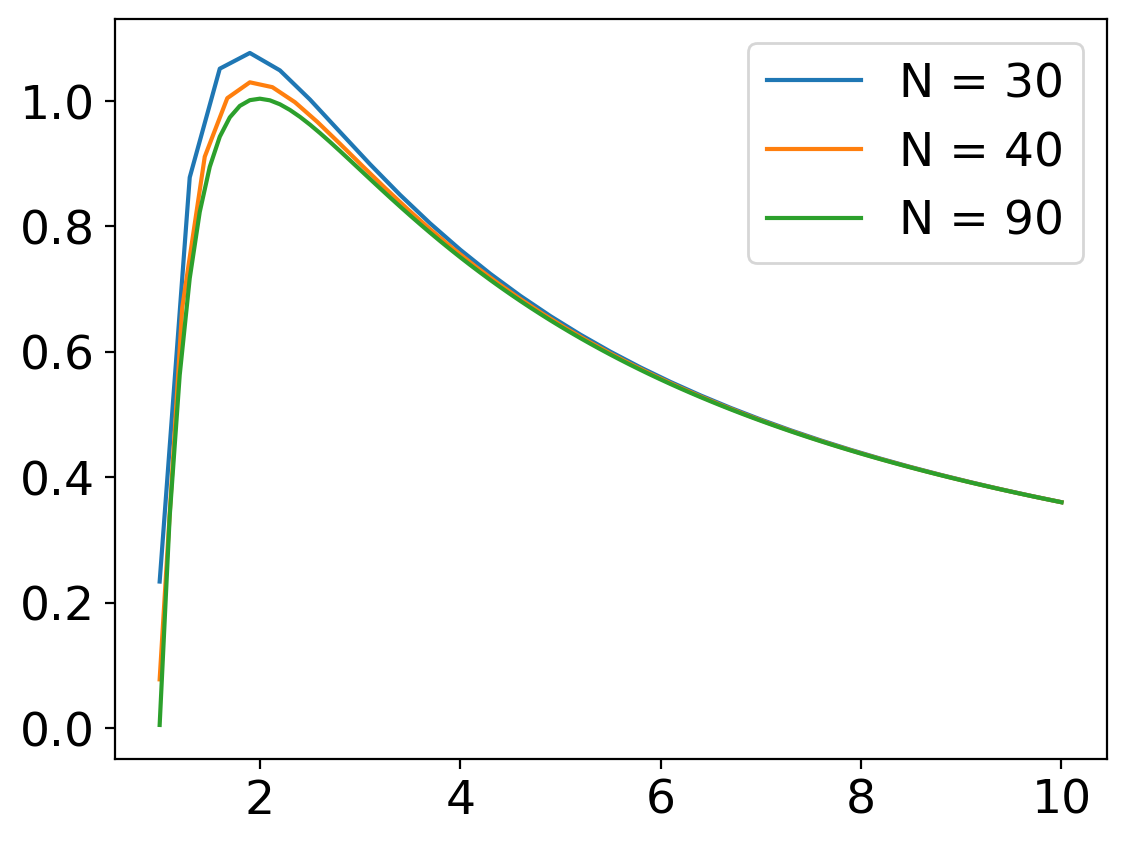

In [1]:
import numpy as np
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size':18,'axes.labelsize':18,'legend.fontsize':17,
'figure.dpi':200,'axes.titlesize': 18, 'xtick.labelsize': 17, 'ytick.labelsize': 17})

def f(x):
    return (4 / x) - (4 / x ** 2)

def Annalytical_Solution(f, x0, xN, N):
    xgrid = np.linspace(x0, xN, N + 1)
    F = f(xgrid)
    return F, xgrid

def centered_difference(f, x0, xN, N):
    xgrid = np.linspace(x0, xN, N + 1)
    dx = xgrid[1] - xgrid[0]
    
    d = (xgrid ** 2) - (2 * xgrid * dx)
    m = (-2 * xgrid ** 2) + (2 * dx ** 2)
    u = (xgrid ** 2) + (2 * xgrid * dx)
    
    A = diags([d[1:], m, u[:-1]], [-1, 0, 1])
    
    B = np.zeros(N + 1)
    B[0] = -d[0] * f(x0 - dx)
    B[-1] = -u[-1] * f(xN + dx)

    F = spsolve(A.tocsr(), B)   # 直接求解，不用循环
    
    return F, xgrid

def centered_plot(N):    
    for i in N:
        F, xgrid = centered_difference(f, x0, xN, i)
        sns.lineplot(x = xgrid, y = F, label = f"N = {i}")

x0, xN = 1.0, 10.0
centered_plot(N = [30, 40, 90])

---

### **Question 3b)**  &nbsp;&nbsp; (5 points)

In [2]:
x0, xN, N = 1.0, 10.0, 104
F, xgrid = centered_difference(f, x0, xN, N)
f_analytical = f(xgrid)
error = np.max(np.abs(F-f_analytical))
print(error)

0.004933123549441754


The maximum absolute error between the analytical solution and the finite-difference results on the interval $[x_0, x_N ]$ when $N = 104$ is computed above, and is equal to **0.493%** (104 is the smallest value of $N$ such that this error is lower than 0.5%).